<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/PractisingDataset/blob/main/Dataset_Project_JOHAN_SANTANA_GALVAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Santana Galván

### Libraries Selected:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import neighbors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)

### Read & Load Dataset:

In [ ]:
# URL from my GitHub repository.
url = 'https://raw.githubusercontent.com/JohanSantanaGalvanJob/PractisingDataset/main/mushrooms.csv'

# I will read the Dataset from my repository.
df = pd.read_csv(url)

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
# Let's see all the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Categorize and normalize data:

In [ ]:
# We will check if there are any null values in this dataset.
null_values = df.isnull().sum()
null_values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
count_question_marks = df.apply(lambda x: x.eq('?').sum())

# Now we will see which columns has "?" value.
print(count_question_marks)

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [ ]:
# I will delete this column but maybe later on I'll recover it. It will depends
# on the results of the model.
df = df.drop(["stalk-root"], axis=1)

In [ ]:
# Delete rows with null values just in case.
df = df.dropna()

In [ ]:
# In this case we don't have any null data in all of the columns,
# so we will categorize all of them.
label = LabelEncoder()

for col in df.columns:
    df[col] = label.fit_transform(df[col])

In [ ]:
# Now I will make sure that there are not other data that could interfiere my
# future "y" 1 is poisonous and 0 is edible.
df['class'].unique()


array([1, 0])

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,2,1,7,7,0,2,1,0,7,4,2


### Correlation Graphic:

<Axes: >

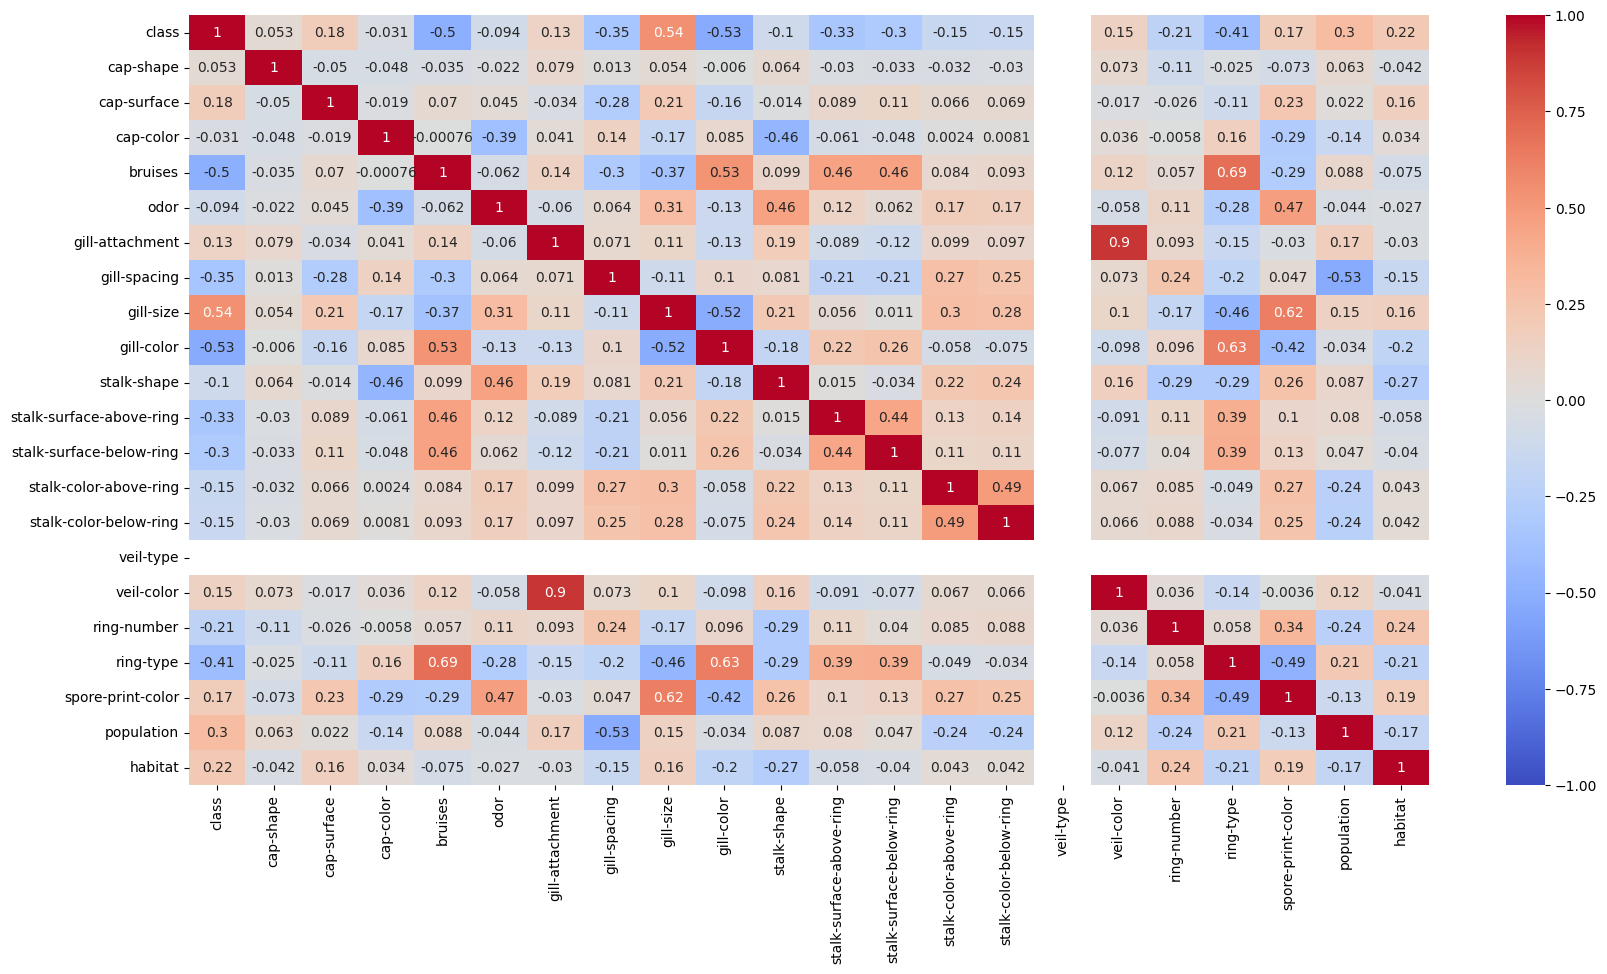

In [ ]:
# This is the Correlation Graphic:
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

In [ ]:
# I will drop all of these columns.
df = df.drop(columns=["veil-type","bruises","gill-color","ring-type", "veil-color"])

<Axes: >

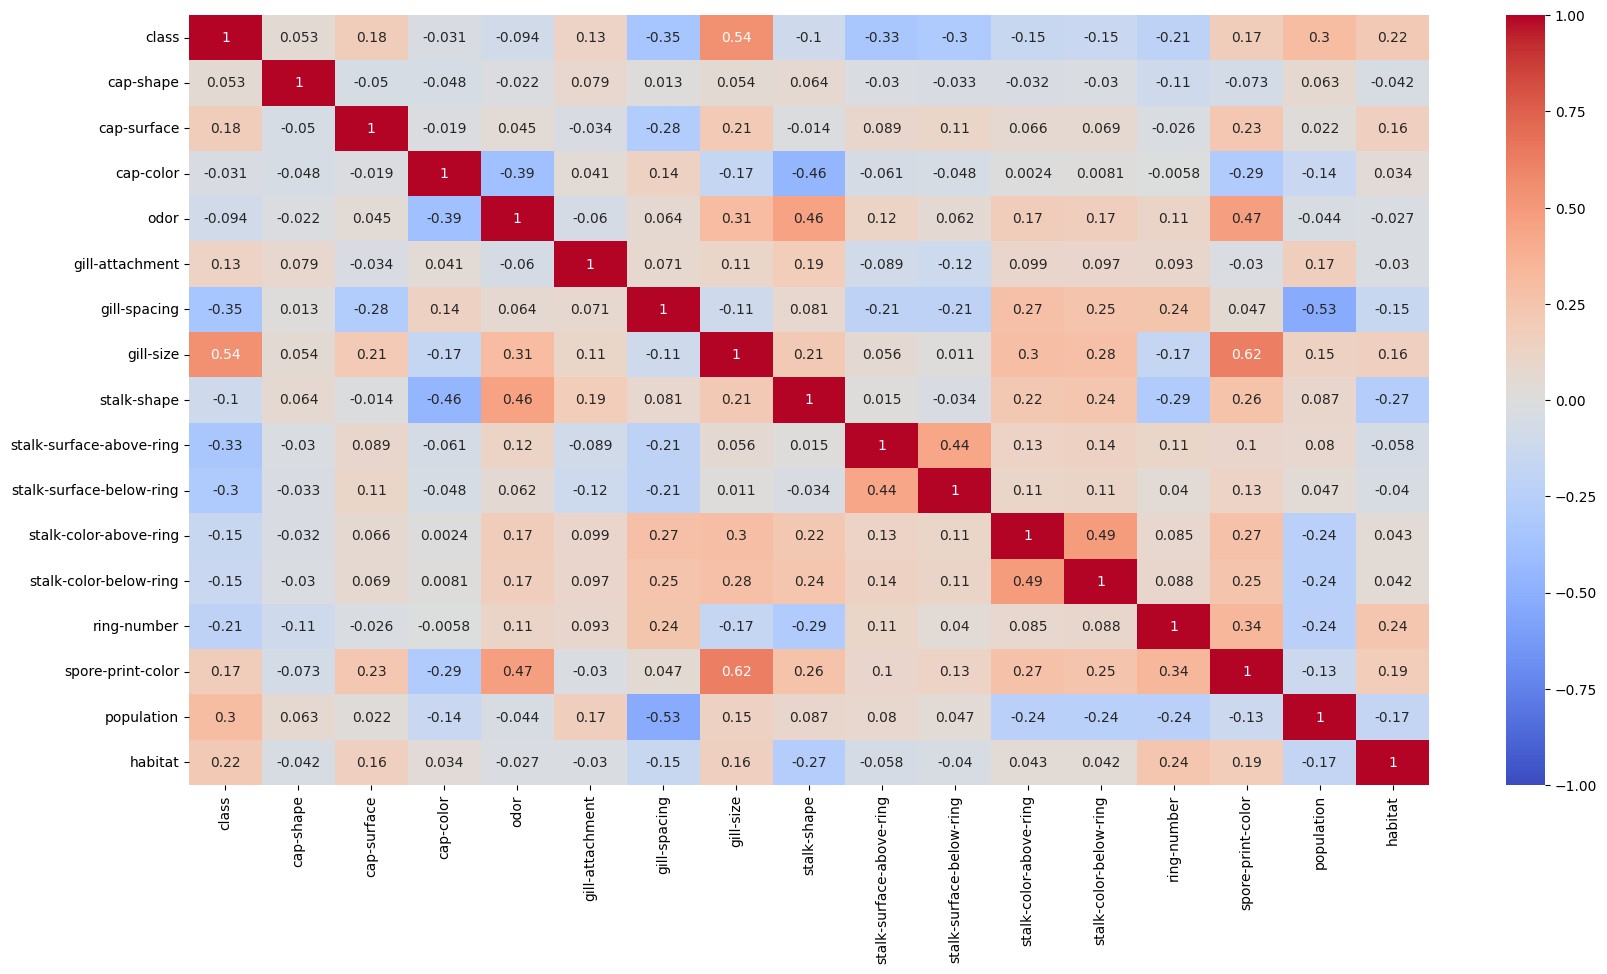

In [ ]:
# This is the current heatmap now.
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

### Dispersion Graphic:

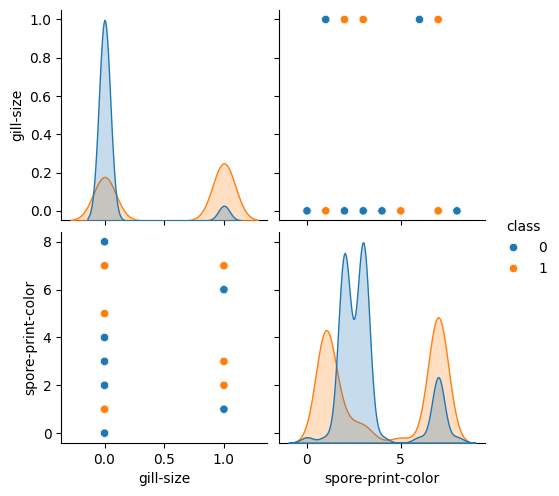

In [ ]:
# This is the dispersion graphic but it will surely not be useful for me.
data_pairplots = df[['gill-size', 'spore-print-color','class']]
sns.pairplot(data_pairplots, hue='class')
plt.show()

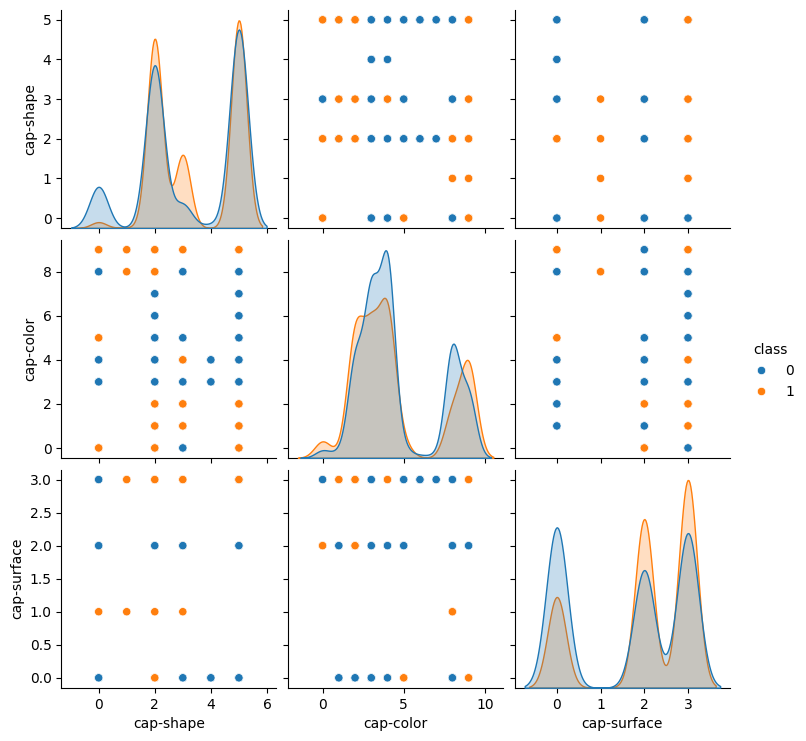

In [ ]:
data_pairplots = df[['cap-shape', 'cap-color','cap-surface','class']]
sns.pairplot(data_pairplots, hue='class')
plt.show()

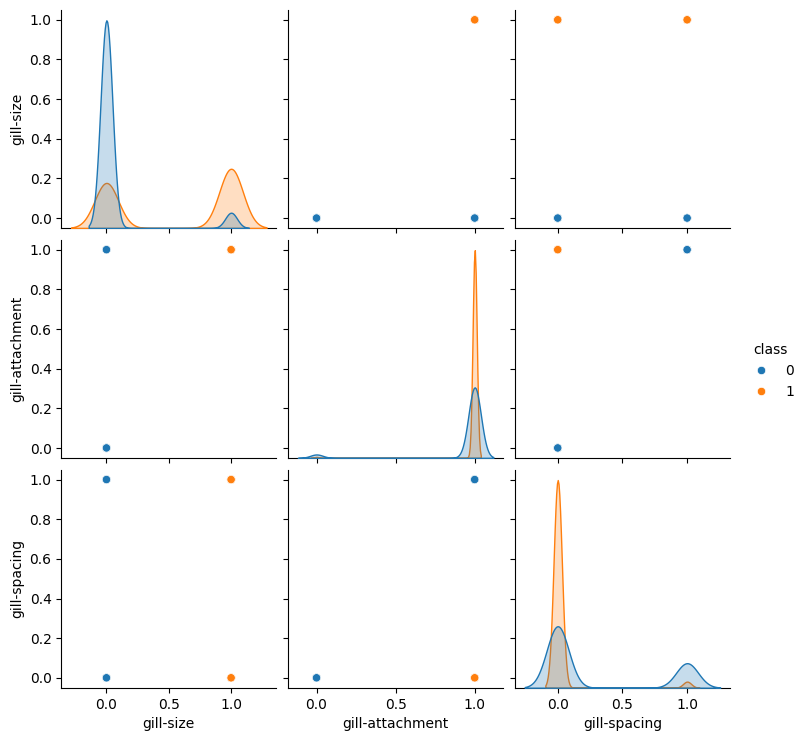

In [ ]:
data_pairplots = df[['gill-size', 'gill-attachment','gill-spacing','class']]
sns.pairplot(data_pairplots, hue='class')
plt.show()

### KBest

In [ ]:
y = df['class']

In [ ]:
# This is the KBest implementation after filtering all of the columns that I chose to delete.
aux = df['class']
df= df.drop(['class'], axis=1)
for i in range(1, 6, 1):
  k = i
  selector = SelectKBest(score_func=f_classif, k=k)

  X_new = selector.fit_transform(df, y)

  selected_columns = df.columns[selector.get_support()]

  print("Características seleccionadas:" + str(i))
  print(str(selected_columns) + "\n")

Características seleccionadas:1
Index(['gill-size'], dtype='object')

Características seleccionadas:2
Index(['gill-spacing', 'gill-size'], dtype='object')

Características seleccionadas:3
Index(['gill-spacing', 'gill-size', 'stalk-surface-above-ring'], dtype='object')

Características seleccionadas:4
Index(['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring'],
      dtype='object')

Características seleccionadas:5
Index(['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'population'],
      dtype='object')



In [ ]:
df = pd.concat([df, aux], axis=1)

In [ ]:
df

In [ ]:
selected_columns = ['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'population']
x = df[selected_columns]

In [ ]:
# Finally this is the train model part
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Naive Bayes Without Cross Validation

In [ ]:
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB', 'CategoricalNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), CategoricalNB()]

for name, clf in zip(names, classifiers):

  # Fit the model
  clf.fit(X_train, y_train)
  # Predict and the score on each NaiveBayes method
  score = clf.score(X_test, y_test) # Returns the mean accuracy on the given test data and labels.
  print ("Modelo Sin Cross Validation: %s = %6.2f" % (name, score))

Modelo Sin Cross Validation: GaussianNB =   0.94
Modelo Sin Cross Validation: MultiNomialNB =   0.94
Modelo Sin Cross Validation: BernouilliNB =   0.76
Modelo Sin Cross Validation: ComplementNB =   0.94
Modelo Sin Cross Validation: CategoricalNB =   0.92


In [ ]:
# This is the confusion Matriz function

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

Confusion matrix, without normalization
[[1211   46]
 [  90 1091]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

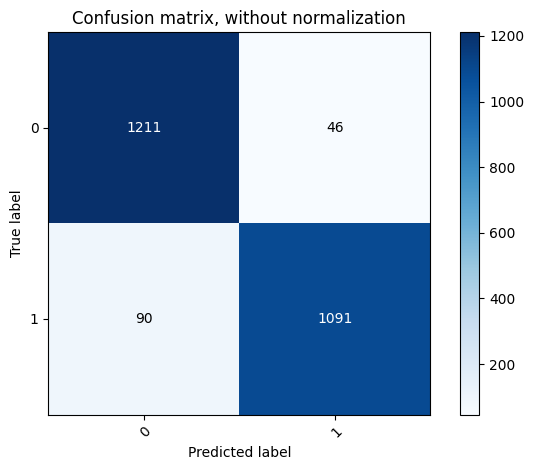

In [ ]:
# Confusion Graphic with GaussianNB implementation because it is the best one.
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

### NaiveBayes with Cross Validation

In [ ]:
# Now I will implement Cross Validation on every NaiveBayes to see if there is an upgrade or not.
from sklearn.model_selection import cross_val_score

sos = []
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Puntuaciones para {}:".format(name))
    print(scores)
    sos.append(scores)

for i in range(len(names)):
    print("Modelo Con Cross Validation (Con Librería): {} = {:.2f}".format(names[i], sos[i].mean()))

Puntuaciones para GaussianNB:
[0.95254833 0.93843448 0.93227792 0.941073   0.94019349]
Puntuaciones para MultiNomialNB:
[0.94200351 0.93315743 0.93051891 0.93579595 0.93403694]
Puntuaciones para BernouilliNB:
[0.75834798 0.75549692 0.78540018 0.76253298 0.75373791]
Puntuaciones para ComplementNB:
[0.94200351 0.92875989 0.9296394  0.93579595 0.93227792]
Puntuaciones para CategoricalNB:
[0.92970123 0.90149516 0.91468777 0.89533861 0.90765172]
Modelo Con Cross Validation (Con Librería): GaussianNB = 0.94
Modelo Con Cross Validation (Con Librería): MultiNomialNB = 0.94
Modelo Con Cross Validation (Con Librería): BernouilliNB = 0.76
Modelo Con Cross Validation (Con Librería): ComplementNB = 0.93
Modelo Con Cross Validation (Con Librería): CategoricalNB = 0.91


In [ ]:
# Model Variable.
model = MultinomialNB()

# Training Data
model.fit(X_train, y_train)
print(X_test.shape)

(2438, 5)


In [ ]:
# Predict Data
y_model = model.predict(X_test)
y_model

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
# Transform Categoric variables just in case I have set the data in non-continous values by mistake.
y_test_df= y_test.to_frame()
y_test_df['class'].replace(['edible', 'poisonous'],[0, 1], inplace=True)
y_test_df

In [ ]:
y_model_df= pd.DataFrame(y_model, columns = ['class'])
y_model_df['class'].replace(['edible', 'poisonous'],[0, 1], inplace=True)
y_model_array = y_model_df['class'].to_numpy()
y_model_array

array([0, 1, 1, ..., 1, 0, 0])

Confusion matrix, without normalization
[[1207   50]
 [ 103 1078]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

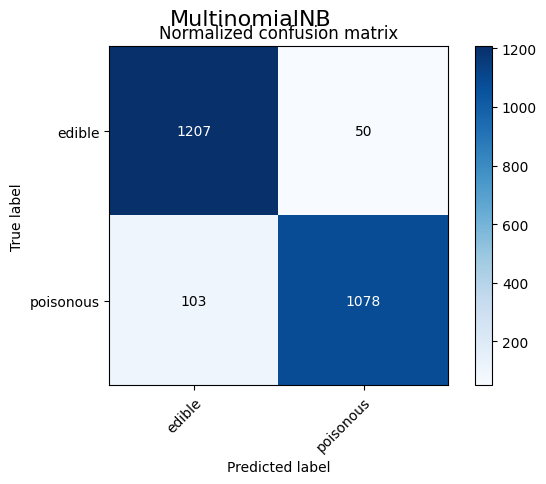

In [ ]:
clases_mushrooms = np.array(['edible', 'poisonous'])
plot_confusion_matrix(y_test_df['class'], y_model_array, classes=clases_mushrooms, normalize=False, title='Normalized confusion matrix', titleSup='MultinomialNB')

### Extra SVM

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Model accuracy SVM: {accuracy:.2f}')

Model accuracy SVM: 0.94


Confusion matrix, without normalization
[[1205   52]
 [  92 1089]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

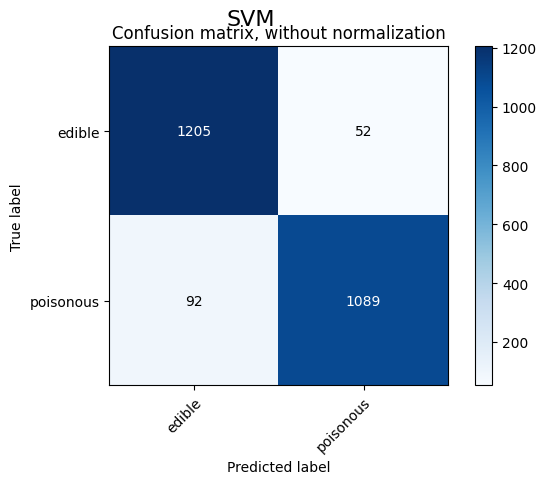

In [ ]:
clases_mushrooms = np.array(['edible', 'poisonous'])
plot_confusion_matrix(y_test, y_pred_svm, classes = clases_mushrooms, normalize=False, titleSup='SVM')

### Extra MLP

In [ ]:
# Create MLP classifier MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train Model
mlp_classifier.fit(X_train, y_train)

# Predict values
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Model accuracy MLP: {accuracy:.2f}')

Model accuracy MLP: 0.97


Confusion matrix, without normalization
[[1241   16]
 [  53 1128]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

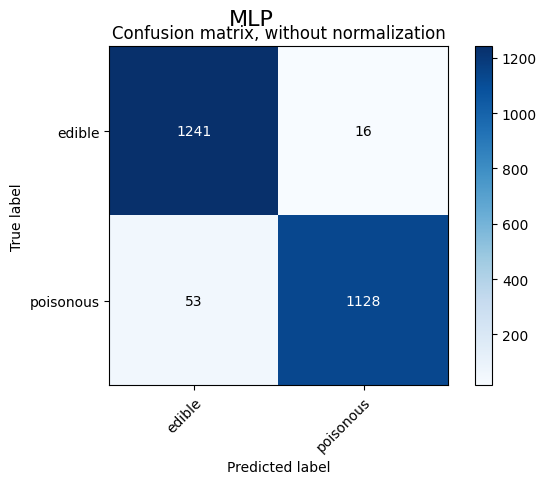

In [ ]:
clases_mushrooms = np.array(['edible', 'poisonous'])
plot_confusion_matrix(y_test, y_pred_mlp, classes = clases_mushrooms, normalize=False, titleSup='MLP')

### KNN Technique:

In [ ]:
train, test = train_test_split(df[['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'population', 'class']], test_size=0.33)

Max Value uniform : 0.9687687368335764 (2)
Max Value distance : 0.9687687368335764 (2)


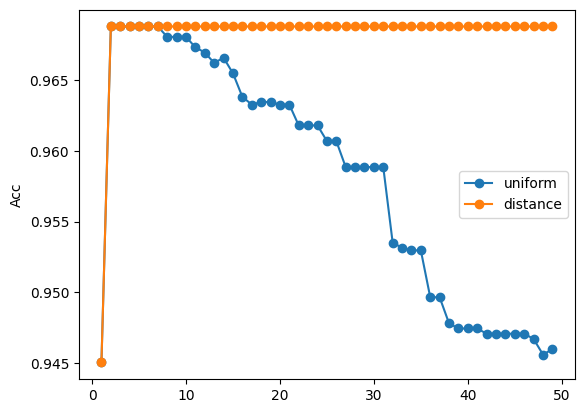

In [ ]:
# For training Cross Validation must be applied
cv = KFold(n_splits = 5, shuffle = False)
train = train.reset_index(drop=True)

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,50):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
       for train_fold, test_fold in cv.split(train):
          # Random train test Split
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # Training and executing the model
          knn.fit( X = f_train.drop(['class'], axis=1),
                               y = f_train['class'])
          y_pred = knn.predict(X = f_test.drop(['class'], axis = 1))
          # Evaluate the model
          acc = accuracy_score(f_test['class'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.show()



In [ ]:
total_scores

In [ ]:

n_neighbors = 2
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights)
# fit and predict
knn.fit(X = train[['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'population']], y = train['class'])
y_pred = knn.predict(X = test[['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'population']])
acc = accuracy_score(test['class'], y_pred)
print ('Acc', acc)


Acc 0.9738903394255874


Confusion matrix, without normalization
[[1403   13]
 [  57 1208]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

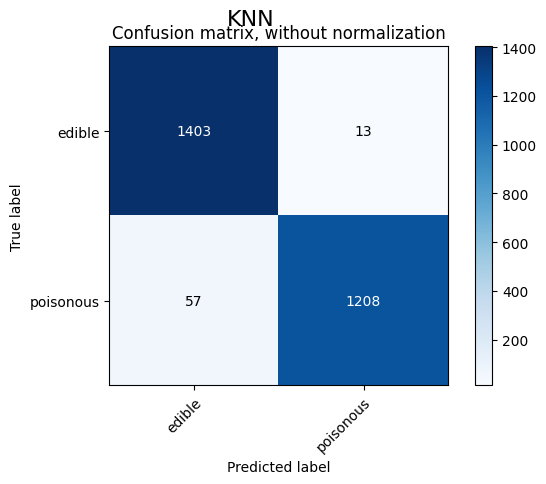

In [ ]:
clases_mushrooms = np.array(['edible', 'poisonous'])
plot_confusion_matrix(test['class'], y_pred, classes = clases_mushrooms, normalize=False, titleSup='KNN')

### Árboles con clasificación:

In [ ]:
# Crear el modelo de árboles de decisión
tree_model = DecisionTreeClassifier()

# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.97


Confusion matrix, without normalization
[[1241   16]
 [  53 1128]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

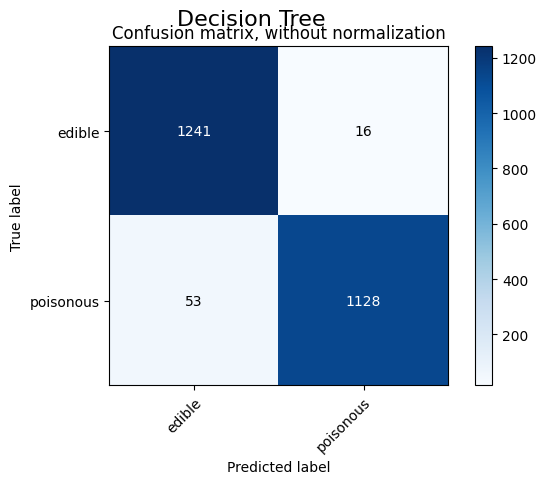

In [ ]:
clases_mushrooms = np.array(['edible', 'poisonous'])
plot_confusion_matrix(y_test, y_pred_tree, classes = clases_mushrooms, normalize=False, titleSup='Clasification Tree')

In [ ]:
# Saves the model
mushroom_filename = "mushroom_model.pkl"
with open(mushroom_filename, 'wb') as file:
    pickle.dump(knn, file)

In [ ]:
# Load the model
mushroom_filename_loaded = "mushroom_model.pkl"
with open(mushroom_filename, 'rb') as file:
    model = pickle.load(file)

In [ ]:
# In my Dataset, edible and poisonous are 0 and 1 respectevely.
def transform_predict(predict):
    if predict == 0:
        return "Edible"
    elif predict == 1:
        return "Poisonous"
    else:
        return "Unknown Class"

In [ ]:
# Doing predicts with the loaded model
predicted_class = model.predict(test[['gill-spacing', 'gill-size', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'population']])
acc = accuracy_score(test['class'], predicted_class)
print ('Acc', acc)
# mushroom_class = transform_predict(predicted_class)

for i in range(len(test)):

  print("This mushroom is:", transform_predict(predicted_class[i]))

In [ ]:
test

,gill-spacing,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,population,class
6966,0,1,2,2,4,1
6396,1,0,1,2,3,0
1773,0,0,2,2,3,0
5507,0,1,2,1,4,1
5843,0,0,1,1,5,1
...,...,...,...,...,...,...
1667,0,1,2,2,3,1
3106,0,0,2,2,5,0
5497,0,1,2,0,4,0
6046,0,1,2,2,4,1
